In [3]:
import networkx as nx
import pandas as pd
import matplotlib as plt

In [31]:
df = pd.read_csv('../data/C34-1522.csv')
dfMunicipios = pd.read_csv('../data/MUNICSBR.csv')
dfHospitais = pd.read_csv('../data/CNESBR.csv')

#Subsitui os códigos de Municipios e Hospitais pelos seus nomes
df['MUNIC_RES'] = df['MUNIC_RES'].map(dfMunicipios.set_index('COD')['MUNIC'])
df['CNES'] = df['CNES'].map(dfHospitais.set_index('CNES')['NOMEFANT'])
df.head(5)

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,230000,2015,1,3,5.268526e+12,2314100097419,1,60811450,"FORTALEZA, CE",19411112,...,NaN,0,0,0,0,0,0,0,0,0
1,230000,2015,1,3,5.268526e+12,2314100097420,1,60811450,"FORTALEZA, CE",19411112,...,NaN,0,0,0,0,0,0,0,0,0
2,230000,2015,1,3,5.268526e+12,2314100097430,1,60811450,"FORTALEZA, CE",19411112,...,NaN,0,0,0,0,0,0,0,0,0
3,230000,2015,1,3,5.268526e+12,2314100096649,1,62908000,"RUSSAS, CE",19600114,...,NaN,0,0,0,0,0,0,0,0,0
4,230000,2015,1,3,5.268526e+12,2314100199081,1,63010000,"JUAZEIRO DO NORTE, CE",19490715,...,NaN,0,0,0,0,0,0,0,0,0


In [32]:
dfHospitalMessejana = df[df['CNES'] == 'HM HOSPITAL DE MESSEJANA DR CARLOS ALBERTO STUDART GOMES']
dfHospitalMessejana.head(5)

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
15,230440,2015,1,3,7.954571e+12,2314103898491,1,60351060,"FORTALEZA, CE",19310405,...,NaN,0,0,0,0,0,0,0,0,0
16,230440,2015,1,3,7.954571e+12,2314105058628,1,60812720,"FORTALEZA, CE",19470602,...,NaN,0,0,0,0,0,0,0,0,0
17,230440,2015,1,3,7.954571e+12,2314104992408,1,60542000,"FORTALEZA, CE",19610422,...,NaN,0,0,0,0,0,0,0,0,0
18,230440,2015,1,3,7.954571e+12,2314104995191,1,60351130,"FORTALEZA, CE",19480724,...,NaN,0,0,0,0,0,0,0,0,0
19,230440,2015,1,3,7.954571e+12,2314104031866,1,60873550,"FORTALEZA, CE",19561216,...,NaN,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Hospital de Messejana admissions per month from 2015 to 2022')

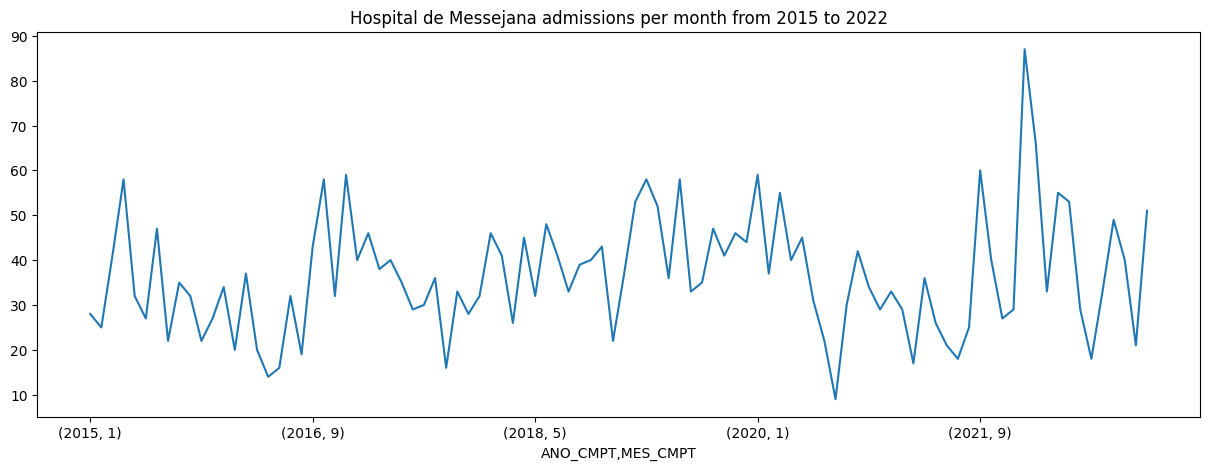

In [34]:
#Internações por mes no Hospital de Messejana de 2015 a 2022
dfHospitalMessejana.groupby(['ANO_CMPT','MES_CMPT']).size().plot(kind='line', figsize=(15,5))
plt.title('Hospital de Messejana admissions per month from 2015 to 2022')

In [7]:
dfSemMessejana = df[df['CNES'] != 'HM HOSPITAL DE MESSEJANA DR CARLOS ALBERTO STUDART GOMES']

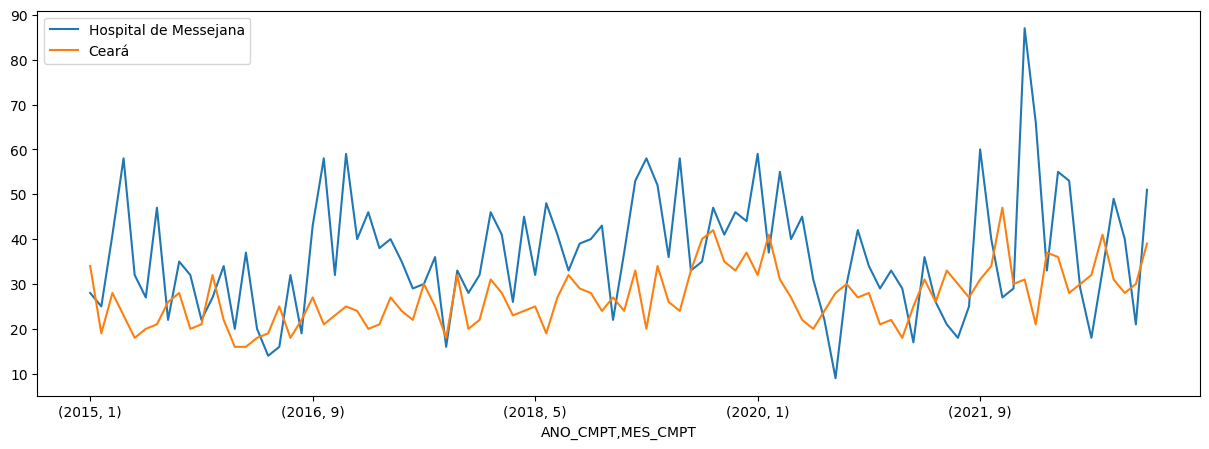

In [35]:
# Gráfico de 2 linha: uma com o total de internações por mes no hospital de messejana e outra com o total de internações por mes no Ceará sem o hospital de messejana
dfHospitalMessejana.groupby(['ANO_CMPT','MES_CMPT']).size().plot(kind='line', figsize=(15,5))
dfSemMessejana.groupby(['ANO_CMPT','MES_CMPT']).size().plot(kind='line', figsize=(15,5))
plt.legend(['Hospital de Messejana', 'Ceará'])

In [50]:
FiltroPrePandemia = [2015,2016,2017,2018,2019]
FiltroPandemia = [2020,2021]
FiltroPosPandemia = [2022]

dfPrePandemia = dfSemMessejana[dfSemMessejana['ANO_CMPT'].isin(FiltroPrePandemia)]

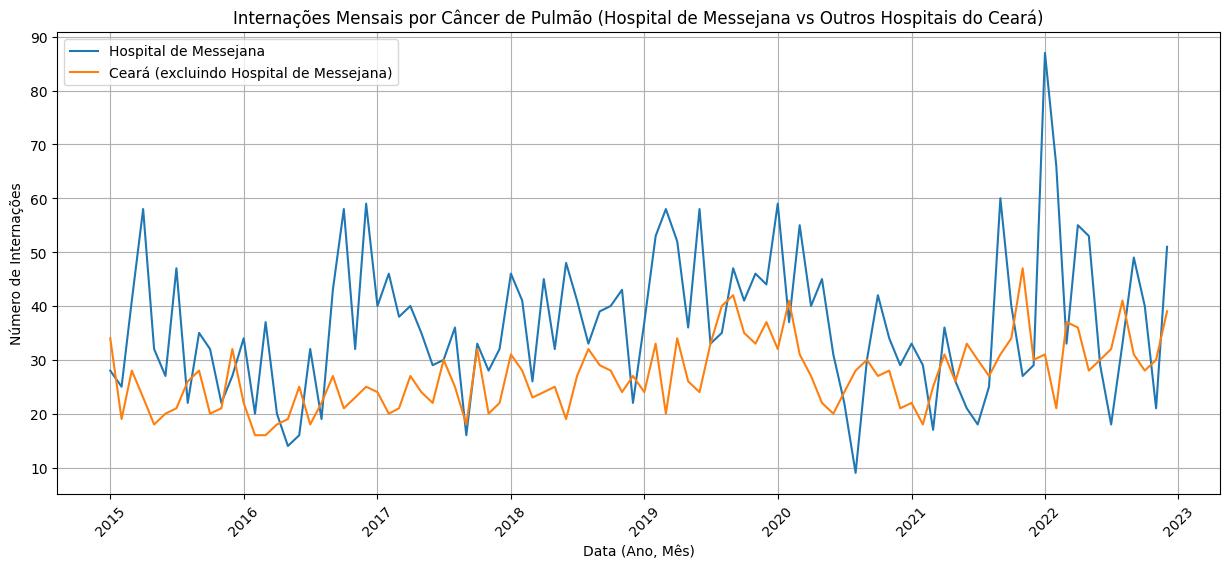

In [60]:
# Agrupando os dados para o Hospital de Messejana por ano e mês
messejana_mensal = dfHospitalMessejana.groupby(['ANO_CMPT', 'MES_CMPT']).size().reset_index(name='Internacoes')
messejana_mensal['Data'] = pd.to_datetime(messejana_mensal['ANO_CMPT'].astype(str) + '-' + messejana_mensal['MES_CMPT'].astype(str) + '-01')

# Agrupando os dados para outros hospitais do Ceará por ano e mês
outros_hospitais_mensal = dfSemMessejana.groupby(['ANO_CMPT', 'MES_CMPT']).size().reset_index(name='Internacoes')
outros_hospitais_mensal['Data'] = pd.to_datetime(outros_hospitais_mensal['ANO_CMPT'].astype(str) + '-' + outros_hospitais_mensal['MES_CMPT'].astype(str) + '-01')

# Criando o gráfico de linhas com índices de data
plt.figure(figsize=(15, 6))
plt.plot(messejana_mensal['Data'], messejana_mensal['Internacoes'], label='Hospital de Messejana')
plt.plot(outros_hospitais_mensal['Data'], outros_hospitais_mensal['Internacoes'], label='Ceará (excluindo Hospital de Messejana)')

# Adicionando títulos e rótulos
plt.title('Internações Mensais por Câncer de Pulmão (Hospital de Messejana vs Outros Hospitais do Ceará)')
plt.xlabel('Data (Ano, Mês)')
plt.ylabel('Número de Internações')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostrando o gráfico
plt.show()

In [55]:
messejana_mensal

,ANO_CMPT,MES_CMPT,Internacoes,Data
0,2015,1,28,2015-01-01
1,2015,2,25,2015-02-01
2,2015,3,41,2015-03-01
3,2015,4,58,2015-04-01
4,2015,5,32,2015-05-01
...,...,...,...,...
91,2022,8,33,2022-08-01
92,2022,9,49,2022-09-01
93,2022,10,40,2022-10-01
94,2022,11,21,2022-11-01


In [56]:
outros_hospitais_mensal

,ANO_CMPT,MES_CMPT,Internacoes,Data
0,2015,1,34,2015-01-01
1,2015,2,19,2015-02-01
2,2015,3,28,2015-03-01
3,2015,4,23,2015-04-01
4,2015,5,18,2015-05-01
...,...,...,...,...
91,2022,8,41,2022-08-01
92,2022,9,31,2022-09-01
93,2022,10,28,2022-10-01
94,2022,11,30,2022-11-01


In [66]:
messejana_mensal = dfHospitalMessejana.groupby(['ANO_CMPT', 'MES_CMPT']).size()
outros_hospitais_mensal = dfSemMessejana.groupby(['ANO_CMPT', 'MES_CMPT']).size()

# Defina os períodos
periodos = {
    '2015-2019': range(2015, 2020),
    '2020-2021': range(2020, 2022),
    '2022': [2022]
}

# Calcule a correlação para cada período
correlacoes = {}
for periodo, anos in periodos.items():
    messejana_periodo = messejana_mensal[messejana_mensal.index.get_level_values('ANO_CMPT').isin(anos)]
    outros_hospitais_periodo = outros_hospitais_mensal[outros_hospitais_mensal.index.get_level_values('ANO_CMPT').isin(anos)]
    correlacao = messejana_periodo.corr(outros_hospitais_periodo)
    correlacoes[periodo] = correlacao

correlacoes

{'2015-2019': 0.253275160505556,
 '2020-2021': 0.12901428005707943,
 '2022': -0.2463613376692487}

In [74]:
# Filtrando os dados para os anos pré-pandemia (2015-2019) e pandemia (2020-2021)
pre_pandemia = dfSemMessejana[dfSemMessejana['ANO_CMPT'].isin(range(2015, 2020))]
durante_pandemia = dfSemMessejana[dfSemMessejana['ANO_CMPT'].isin([2020, 2021])]

# Agrupando as internações por hospital
internacoes_pre_pandemia = pre_pandemia.groupby('CNES').size()
internacoes_durante_pandemia = durante_pandemia.groupby('CNES').size()

# Comparando os números de internações
comparacao_hospitais = pd.DataFrame({
    'Internacoes_Pre_Pandemia': internacoes_pre_pandemia,
    'Internacoes_Durante_Pandemia': internacoes_durante_pandemia
})

# Calculando a diferença nas internações
comparacao_hospitais['Diferenca'] = comparacao_hospitais['Internacoes_Durante_Pandemia'] - comparacao_hospitais['Internacoes_Pre_Pandemia']

# Filtrando hospitais com aumento significativo de internações
hospitais_aumento_significativo = comparacao_hospitais[comparacao_hospitais['Diferenca'] > 0].sort_values(by='Diferenca', ascending=False)

hospitais_aumento_significativo.head(10)  # Mostrando os top 10 hospitais com maior aumento


,Internacoes_Pre_Pandemia,Internacoes_Durante_Pandemia,Diferenca
CNES,,,
HOSPITAL DISTRITAL DR FERNANDES TAVORA,7.0,21.0,14.0
SANTA CASA DE MORADA NOVA,7.0,11.0,4.0
HOSPITAL MUNICIPAL DR EUDASIO BARROSO HMEB,2.0,4.0,2.0
HOSPITAL MUNICIPAL E MATERNIDADE SAO JOSE,3.0,5.0,2.0
HOSPITAL MUNICIPAL SENADOR CARLOS JEREISSATI,4.0,6.0,2.0
INSTITUTO PRAXIS,4.0,6.0,2.0
HOSPITAL REGIONAL DE ICO DEPUTADO ORIEL GUIMARAES NUNES,2.0,3.0,1.0
HOSPITAL REGIONAL DO CARIRI,18.0,19.0,1.0


In [78]:
# Agrupando as internações por hospital e ano para o DataFrame que exclui o Hospital de Messejana
internacoes_por_ano_hospital = df.groupby(['CNES', 'ANO_CMPT']).size().unstack(fill_value=0)

# Ordenando os hospitais pelo total de internações durante o período
internacoes_por_ano_hospital['Total'] = internacoes_por_ano_hospital.sum(axis=1)
internacoes_por_ano_hospital_sorted = internacoes_por_ano_hospital.sort_values(by='Total', ascending=False)

# Removendo a coluna total para melhor visualização dos resultados anuais
internacoes_por_ano_hospital_sorted.drop(columns=['Total'], inplace=True)

internacoes_por_ano_hospital_sorted.head(20)  # Mostrando os top 10 hospitais com maior número total de internações



ANO_CMPT,2015,2016,2017,2018,2019,2020,2021,2022
CNES,,,,,,,,
HM HOSPITAL DE MESSEJANA DR CARLOS ALBERTO STUDART GOMES,396,384,403,456,540,433,361,535
HOSPITAL MATERNIDADE SAO VICENTE DE PAULO HMSVP,11,14,22,32,53,46,72,67
HOSPITAL HAROLDO JUACABA,14,26,32,54,55,39,29,15
HGCC HOSPITAL GERAL DR CESAR CALS,40,31,19,23,23,25,25,28
SANTA CASA DE MISERICORDIA DE SOBRAL,15,20,13,16,28,40,19,15
HGF HOSPITAL GERAL DE FORTALEZA,16,15,8,15,10,14,32,34
HOSPITAL E CASA DE SAUDE DE RUSSAS,9,15,24,19,14,15,16,22
HOSPITAL UNIVERSITARIO WALTER CANTIDIO,21,16,19,17,17,8,14,17
HOSPITAL GERAL DR WALDEMAR ALCANTARA,32,15,14,17,17,11,15,7
